In [5]:
#Importamos la Librerias
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime
import pandas as pd
from matplotlib import pyplot
import matplotlib

# Datos de la Bolsa de Madrid

---


In [6]:
#Enlace de la Bolsa Madrid
url="https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000"
path='csv/bolsaMadrid.csv'

In [7]:
#Haremos el request a esa ruta
#Procesamos el HTML mediante BeautifulSoap
req = requests.get(url).text
soup = BeautifulSoup(req, "lxml")

In [8]:
# Obtenemos la tabla por un ID específico
table = soup.find("table", {"id":"ctl00_Contenido_tblAcciones"})


In [9]:
name=""
price=""
diferencia=""
maximo=""
minimo=""
numRow=0

for row in table.find_all("tr"):
  numCell=0
  for cell in row.find_all("td"):
    if numCell == 0:
      name=cell.text
      
      print("Accion:", name)
    if numCell == 1:
      price=cell.text

      print("Ultimo:", price)
    if numCell == 2:
      diferencia=cell.text
      print("Diferencia:", diferencia)
    if numCell == 3:
      maximo=cell.text
      print("Maximo:", maximo)
    if numCell == 4:
      minimo=cell.text
      print("Minimo:", minimo,'\n')
    numCell+=1
  numRow+=1    
  

  #Creamos el CSV
  with open(path, 'a',  newline="") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow([name, price, diferencia, maximo, minimo, datetime.now()])
  csv_file.close()
df = pd.read_csv(path)



Accion: ACCIONA
Ultimo: 159,1000
Diferencia: -0,25
Maximo: 164,2000
Minimo: 158,8000 

Accion: ACERINOX
Ultimo: 11,3800
Diferencia: 0,35
Maximo: 11,5450
Minimo: 11,2350 

Accion: ACS
Ultimo: 22,2600
Diferencia: -1,02
Maximo: 22,9100
Minimo: 22,2600 

Accion: AENA
Ultimo: 146,0000
Diferencia: 0,21
Maximo: 147,1000
Minimo: 144,7500 

Accion: ALMIRALL
Ultimo: 12,6700
Diferencia: -0,47
Maximo: 12,8200
Minimo: 12,6700 

Accion: AMADEUS
Ultimo: 59,1600
Diferencia: 0,96
Maximo: 59,2600
Minimo: 57,8200 

Accion: ARCELORMIT.
Ultimo: 28,4150
Diferencia: -0,56
Maximo: 28,9800
Minimo: 28,3050 

Accion: B.SANTANDER
Ultimo: 3,2375
Diferencia: -2,19
Maximo: 3,3270
Minimo: 3,2160 

Accion: BA.SABADELL
Ultimo: 0,6696
Diferencia: -2,87
Maximo: 0,6990
Minimo: 0,6650 

Accion: BANKINTER
Ultimo: 4,8780
Diferencia: -0,51
Maximo: 5,0140
Minimo: 4,8500 

Accion: BBVA
Ultimo: 6,0400
Diferencia: -2,31
Maximo: 6,2600
Minimo: 6,0050 

Accion: CAIXABANK
Ultimo: 2,4670
Diferencia: -1,83
Maximo: 2,5190
Minimo: 2,467

# Tabla

---


In [15]:
#Creamos las columnas para el DataFrame
columnsName = ["Accion", "Precio", "%Diferencia", "Maximo", "Minimo", "Fecha"]
df.columns = columnsName

#Eliminamos Datos NaN
df = df.dropna()

#Convertimos en float

df['Precio'] = [str(x).replace(',','.') for x in df['Precio']]
df['Precio'] = df['Precio'].astype(float)


df['%Diferencia'] = [str(x).replace(',','.') for x in df['%Diferencia']]
df['%Diferencia'] = df['%Diferencia'].astype(float)

df['%Diferencia'] = [str(x).replace(',','.') for x in df['%Diferencia']]
df['%Diferencia'] = df['%Diferencia'].astype(float)

df['Minimo'] = [str(x).replace(',','.') for x in df['Minimo']]
df['Minimo'] = df['Minimo'].astype(float)

df['Maximo'] = [str(x).replace(',','.') for x in df['Maximo']]
df['Maximo'] = df['Maximo'].astype(float)



#Ordenamos la columna Precio
df=df.sort_values("Precio")
df.to_csv(path, index=False)
df.shape
df


,Accion,Precio,%Diferencia,Maximo,Minimo,Fecha
44,BA.SABADELL,0.6696,-2.87,0.6990,0.6650,2021-11-04 17:32:39.528270
0,BA.SABADELL,0.6922,-0.97,0.7014,0.6818,2021-11-02 12:45:30.472141
60,MAPFRE,1.9140,-1.09,1.9510,1.8815,2021-11-04 17:32:39.538230
1,IAG,1.9315,-1.90,1.9910,1.9245,2021-11-02 12:45:30.485039
2,MAPFRE,1.9635,-0.33,1.9745,1.9210,2021-11-02 12:45:30.488669
...,...,...,...,...,...,...
32,PHARMA MAR,61.9200,2.48,63.1800,60.5400,2021-11-02 12:45:30.491689
33,AENA,144.8500,-0.55,145.4000,143.7500,2021-11-02 12:45:30.468102
39,AENA,146.0000,0.21,147.1000,144.7500,2021-11-04 17:32:39.524288
36,ACCIONA,159.1000,-0.25,164.2000,158.8000,2021-11-04 17:32:39.520512


# Mayor Ganancia y Mayor Pérdida

---


In [11]:
#Calculamos Maximo y minimo
maxGanancia = df['Precio'].max()
maxPerdida = df['Precio'].min()
print("Mayor ganancia:", maxGanancia, "\nMayor pérdida:",maxPerdida)


Mayor ganancia: 168.2 
Mayor pérdida: 0.6696


# Gráfico

---


In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

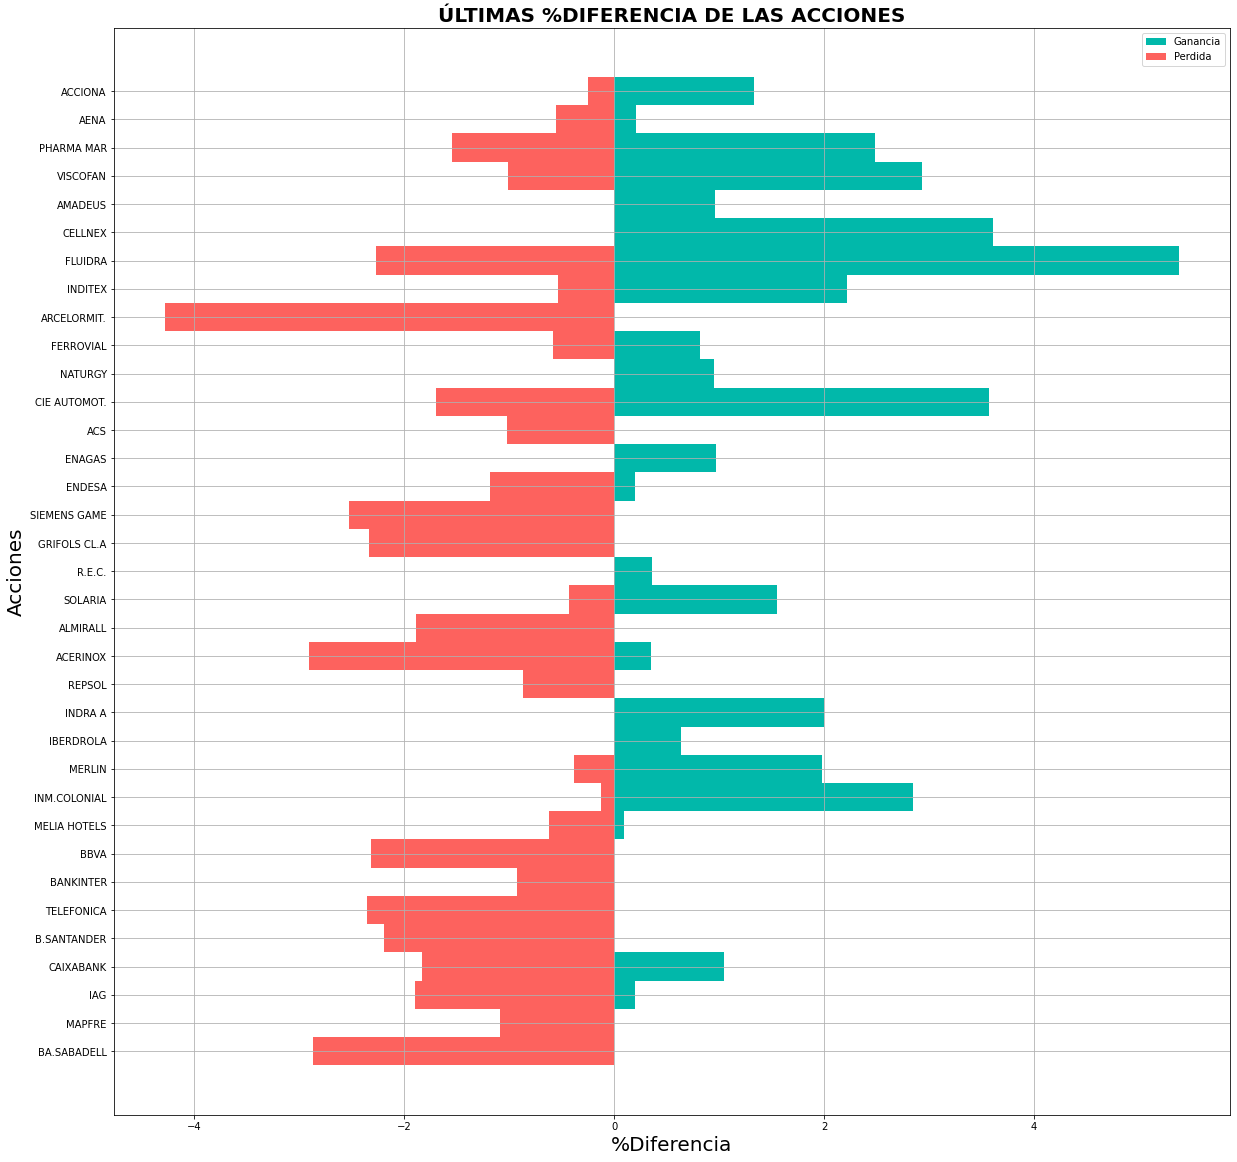

In [14]:
y = df['%Diferencia']
x = df['Accion']

plt.figure(figsize=(20,20))

mayG = df['%Diferencia']  > 0
mayP = df['%Diferencia'] <= 0
plt.grid()
mY=plt.barh(x, y, mayG, color='#01b8aa', label="Ganancia")
my=plt.barh(x, y, mayP, color='#fd625e', label="Perdida")

plt.ylabel('Acciones',fontsize=20)
plt.xlabel('%Diferencia',fontsize=20)
plt.title('ÚLTIMAS %DIFERENCIA DE LAS ACCIONES',fontsize=20, fontweight='bold')
plt.legend()
plt.show();

